# Logisitic Regression

In [1]:
#import modules
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline  

from scipy.optimize import minimize

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

##### Load and Plot Data

In [2]:
def loadData(file_name,delimiter):
    data=np.loadtxt(file_name,delimiter=delimiter)
    return data

In [3]:
ex1_data=loadData('data/ex2data1.txt',',')
ex1_data.shape

(100, 3)

In [4]:
X = np.c_[np.ones((ex1_data.shape[0],1)), ex1_data[:,:2]]
y = np.c_[ex1_data[:,2]]

In [5]:
def plot_data(data):
    
    negative=data[:,2]==0
    positive=data[:,2]==1
    
    plt.scatter(data[positive][:,0],data[positive][:,1],marker='o',c='g',label='Admitted')
    plt.scatter(data[negative][:,0],data[negative][:,1],marker='x',c='r',label='Not Admitted')
    
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()

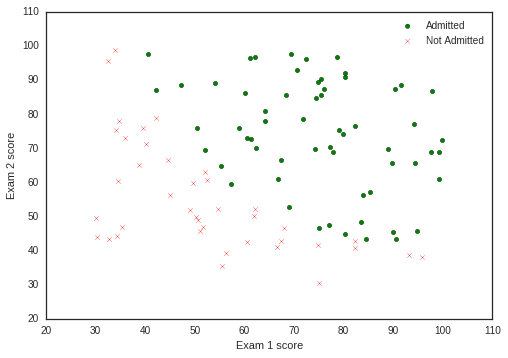

In [6]:
plot_data(ex1_data)

##### Sigmoid Function

In [7]:
def sigmoid(z):
    return (1./(1+np.exp(-z)))

In [8]:
sigmoid(0)

0.5

##### Gradient Descent

In [9]:
def computeCost(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = (-1./m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
               
    if np.isnan(J[0]):
        return np.inf
    return J[0]

In [10]:
def gradient(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    
    grad =(1./m)*X.T.dot(h-y)

    return grad.flatten()

In [11]:
theta = np.zeros(X.shape[1])
cost = computeCost(theta, X, y)
grad = gradient(theta, X, y)

print 'Cost: ', cost
print 'Grad: \n', grad

Cost:  0.69314718056
Grad: 
[ -0.1        -12.00921659 -11.26284221]


In [12]:
opt_res = minimize(computeCost, theta, args=(X,y), jac=gradient, options={'maxiter':400})
opt_res

   status: 0
  success: True
     njev: 30
     nfev: 38
 hess_inv: array([[  3.01998082e+03,  -2.45311285e+01,  -2.41019887e+01],
       [ -2.45311285e+01,   2.13929589e-01,   1.82876151e-01],
       [ -2.41019887e+01,   1.82876151e-01,   2.07311906e-01]])
      fun: 0.2034977015894554
        x: array([-25.16133446,   0.20623173,   0.20147159])
  message: 'Optimization terminated successfully.'
      jac: array([ -3.82187487e-08,  -2.04613466e-06,  -2.66782043e-06])
      nit: 25

In [13]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return p.astype('int')

In [14]:
# Student with Exam 1 score 45 and Exam 2 score 85
# Predict using the optimized Theta values from above (res.x)
sigmoid(np.array([1, 45, 85]).dot(opt_res.x.T))

0.7762905104720228

In [15]:
p = predict(opt_res.x, X) 
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))

Train accuracy 89%


##### Decision Boundary

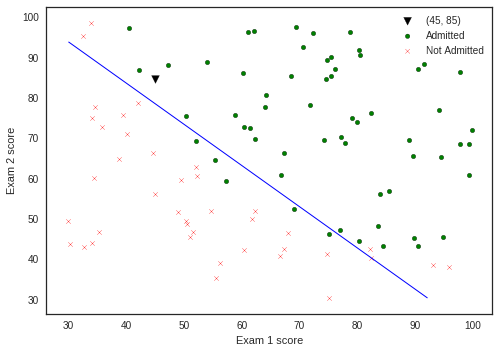

In [16]:
plt.scatter(45, 85, s=60, c='k', marker='v', label='(45, 85)')
plot_data(ex1_data)
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(opt_res.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b');

### Regularized logistic regression

In [17]:
ex2_data=np.loadtxt('data/ex2data2.txt',delimiter=',')

In [18]:
X=ex2_data[:,:2]
y=ex2_data[:,2]

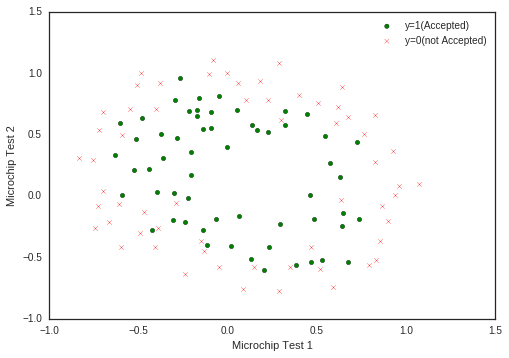

In [19]:
negative=ex2_data[:,2]==0
positive=ex2_data[:,2]==1
    
plt.scatter(ex2_data[positive][:,0],ex2_data[positive][:,1],marker='o',c='g',label='y=1(Accepted)')
plt.scatter(ex2_data[negative][:,0],ex2_data[negative][:,1],marker='x',c='r',label='y=0(not Accepted)')
    
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend()

##### Feature Mapping

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
degree=PolynomialFeatures(6)
X1=degree.fit_transform(ex2_data[:,:2])
X1.shape

(118, 28)

##### Cost Function and Gradient

In [22]:
def computeCostReg(initial_theta, X1, y, l):
    m = y.size
    h = sigmoid(X1.dot(initial_theta))
    
    J = np.add((-1./m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)),(l/(2.*m))*np.sum(np.square(theta[1:])))
    
    if np.isnan(J):
        return np.inf
    return J

In [23]:
def gradientReg(initial_theta, X1, y,l):
    m = y.size
    h = sigmoid(X1.dot(initial_theta))
    
    grad =(1./m)*X1.T.dot(h-y)
    theta_nozero=np.r_[[0],initial_theta[1:]]
    
    grad+=(((1.*l)/m)*theta_nozero)
    
    return grad

In [24]:
initial_theta = np.zeros(X1.shape[1])
print 'Cost: ', computeCostReg(initial_theta, X1, y, 0)
print 'Grad: \n', gradientReg(initial_theta,X1,y,0)

Cost:  0.69314718056
Grad: 
[  8.47457627e-03   1.87880932e-02   7.77711864e-05   5.03446395e-02
   1.15013308e-02   3.76648474e-02   1.83559872e-02   7.32393391e-03
   8.19244468e-03   2.34764889e-02   3.93486234e-02   2.23923907e-03
   1.28600503e-02   3.09593720e-03   3.93028171e-02   1.99707467e-02
   4.32983232e-03   3.38643902e-03   5.83822078e-03   4.47629067e-03
   3.10079849e-02   3.10312442e-02   1.09740238e-03   6.31570797e-03
   4.08503006e-04   7.26504316e-03   1.37646175e-03   3.87936363e-02]


In [25]:
res2_lambda0 = minimize(computeCostReg, initial_theta, args=(X1, y, 0), jac=gradientReg, options={'maxiter':3000})
res2_lambda1 = minimize(computeCostReg, initial_theta, args=(X1, y, 1), jac=gradientReg, options={'maxiter':3000})
res2_lambda2 = minimize(computeCostReg, initial_theta, args=(X1, y, 2), jac=gradientReg, options={'maxiter':3000})

In [26]:
p0 = predict(res2_lambda0.x, X1) 
p1 = predict(res2_lambda1.x, X1)
p2 = predict(res2_lambda2.x, X1)  
print('Train accuracy lambda=0 : {}%'.format(100.*sum(p0 == y.ravel())/p0.size))
print('Train accuracy lambda=1 : {}%'.format(100.*sum(p1 == y.ravel())/p1.size))
print('Train accuracy lambda=2 : {}%'.format(100.*sum(p2 == y.ravel())/p2.size))

Train accuracy lambda=0 : 91.5254237288%
Train accuracy lambda=1 : 82.2033898305%
Train accuracy lambda=2 : 83.0508474576%


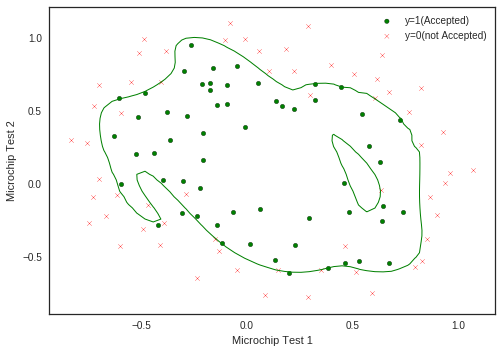

In [27]:
negative=ex2_data[:,2]==0
positive=ex2_data[:,2]==1
    
plt.scatter(ex2_data[positive][:,0],ex2_data[positive][:,1],marker='o',c='g',label='y=1(Accepted)')
plt.scatter(ex2_data[negative][:,0],ex2_data[negative][:,1],marker='x',c='r',label='y=0(not Accepted)')
    
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend()

x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(degree.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res2_lambda0.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');   

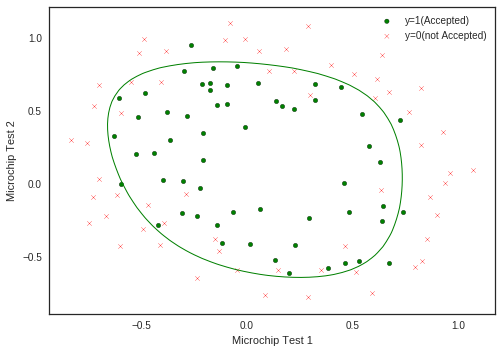

In [28]:
negative=ex2_data[:,2]==0
positive=ex2_data[:,2]==1
    
plt.scatter(ex2_data[positive][:,0],ex2_data[positive][:,1],marker='o',c='g',label='y=1(Accepted)')
plt.scatter(ex2_data[negative][:,0],ex2_data[negative][:,1],marker='x',c='r',label='y=0(not Accepted)')
    
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend()

x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(degree.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res2_lambda1.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');   

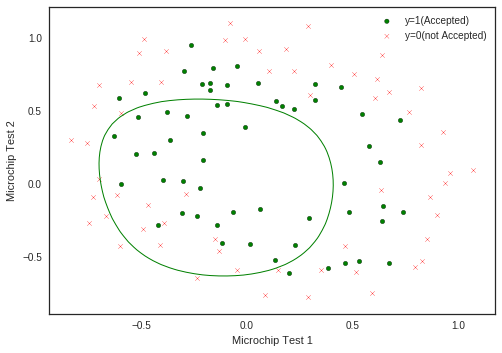

In [29]:
negative=ex2_data[:,2]==0
positive=ex2_data[:,2]==1
    
plt.scatter(ex2_data[positive][:,0],ex2_data[positive][:,1],marker='o',c='g',label='y=1(Accepted)')
plt.scatter(ex2_data[negative][:,0],ex2_data[negative][:,1],marker='x',c='r',label='y=0(not Accepted)')
    
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend()

res2_lambda100 = minimize(computeCostReg, initial_theta, args=(X1, y, 100), jac=gradientReg, options={'maxiter':3000})
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(degree.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res2_lambda100.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='g'); 

<b>--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>